**1. View Basic Data Information**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import os.path
from pandas import Series,DataFrame

data_train = pd.read_csv("breast-cancer-wisconsin.csv", header=None)        
data_train

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [2]:
headerList = ['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
        'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
 
# add header
data_train.columns=headerList
data_train.columns = [c.replace(' ', '_') for c in data_train.columns]

data_train

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


since all the entries are non-null, we don't have to fill gaps in any missing data

In [4]:
data_train.describe()

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
data_train.Bare_Nuclei.unique()  #exist '?', need to deal with it later

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
data_train.dtypes

id                              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

**2. Data Analysis**

In [7]:
data_train.head()

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
data_train.Class

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [9]:
data_train.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

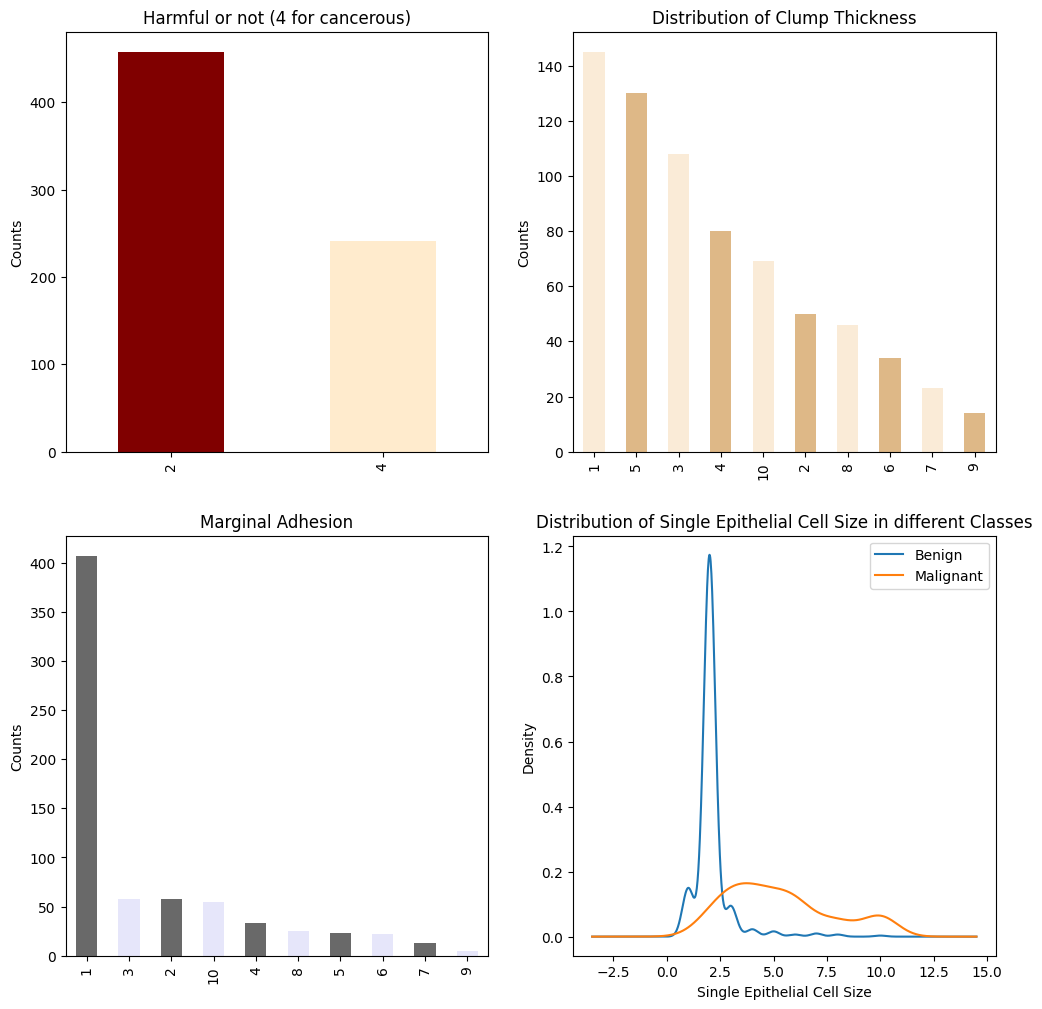

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(12, 12)     #set the canvas size, put four graphs here

plt.subplot2grid((2,2),(0,0))   #set the start point and end point
data_train.Class.value_counts().plot(kind='bar',color=('maroon','blanchedalmond')) 
plt.ylabel("Counts")  
plt.title("Harmful or not (4 for cancerous)")

plt.subplot2grid((2,2),(0,1))  
data_train.Clump_Thickness.value_counts().plot(kind="bar",color=('antiquewhite','burlywood'))
plt.ylabel("Counts")
plt.title("Distribution of Clump Thickness")

plt.subplot2grid((2,2),(1,0))
data_train.Marginal_Adhesion.value_counts().plot(kind='bar',color=('dimgray','lavender'))
plt.ylabel("Counts") 
plt.title("Marginal Adhesion")

plt.subplot2grid((2,2),(1,1))
data_train.Single_Epithelial_Cell_Size[data_train.Class == 2].plot(kind='kde')   #select the Bare_Nuclei column where Class is 2
data_train.Single_Epithelial_Cell_Size[data_train.Class == 4].plot(kind='kde')   #select the Bare_Nuclei column where Class is 4
plt.xlabel("Single Epithelial Cell Size")    #plots an axis lable
plt.ylabel("Density") 
plt.title("Distribution of Single Epithelial Cell Size in different Classes")
plt.legend(('Benign', 'Malignant'),loc='best')

plt.show()

From the above graphs we can see:

A large portion of cells are benign cells;

Clump thinkness seems to have little effect on the malignancy of the cells, and the data are uniformly distributed below each measure;

Although marginal adhesion has the highest counts for measure 1, each measure is actually more evenly distributed;

Single Epithelial Cell Size seems to be closely related to the malignancy of the cells, the cell size of benign cells is below 5.0, with a peak of 2.5. However, the cell size of malignant cells ranged from 2.5 to 10, and did not show a clear trend like benign cells. This feature may be an important criterion for judging the malignancy of a cell.

The above is only a random selection of attributes for graphical analysis, following are more detailed analysis.

**Relations between Uniformity of Cell Size, Shape and Malignancy**

/var/folders/nw/m2f36hr10ql32mhz1g5x26hh0000gn/T/ipykernel_5775/1795765803.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='y')


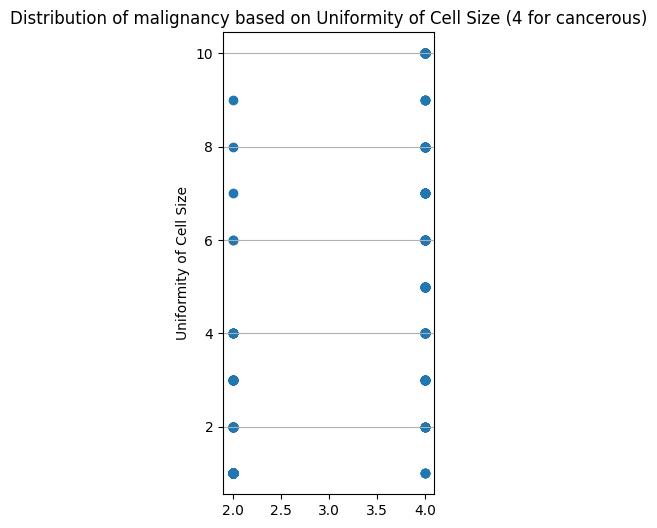

/var/folders/nw/m2f36hr10ql32mhz1g5x26hh0000gn/T/ipykernel_5775/1795765803.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='y')


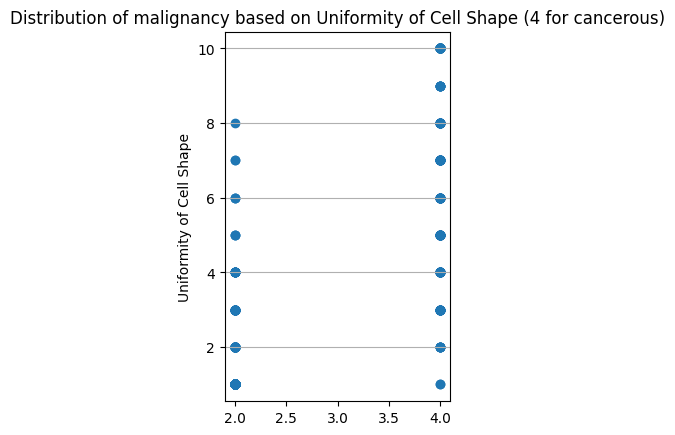

In [11]:
fig = plt.figure()
fig.set_size_inches(6, 6)     #set the canvas size, put two graphs here

plt.subplot(1,2,1)
plt.scatter(data_train.Class, data_train.Uniformity_of_Cell_Size)
plt.ylabel("Uniformity of Cell Size")
plt.grid(b=True, which='major', axis='y') 
plt.title("Distribution of malignancy based on Uniformity of Cell Size (4 for cancerous)")
plt.show()

plt.subplot(1,2,2)
plt.scatter(data_train.Class, data_train.Uniformity_of_Cell_Shape)
plt.ylabel("Uniformity of Cell Shape")
plt.grid(b=True, which='major', axis='y') 
plt.title("Distribution of malignancy based on Uniformity of Cell Shape (4 for cancerous)")
plt.show()

From the above figure we can see that the uniformity of cell size and shape of malignant cells is very uniform, and every measure of malignant cells is accounted for. However, the cell size and shape uniformity of benign cells are more concentrated in the small number measure, for cell size uniformity, measure 10 does not exist, and for cell shape uniformity, even measure 9 and 10 do not exist. However, in general, these two attributes do not differ significantly between benign and malignant cells. We could ignore them for now.

**Relations between Single Epithelial Cell Size and Malignancy**

In [12]:
benign = data_train.Single_Epithelial_Cell_Size[data_train.Class == 2].value_counts()
malignant = data_train.Single_Epithelial_Cell_Size[data_train.Class == 4].value_counts()

In [13]:
benign

2     363
1      46
3      29
4       7
5       5
7       3
6       2
8       2
10      1
Name: Single_Epithelial_Cell_Size, dtype: int64

In [14]:
malignant

3     43
4     41
6     39
5     34
10    30
2     23
8     19
7      9
9      2
1      1
Name: Single_Epithelial_Cell_Size, dtype: int64

<Figure size 640x480 with 0 Axes>

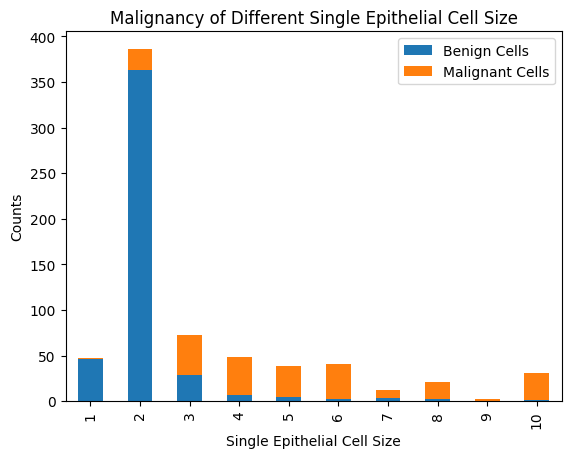

In [15]:
fig = plt.figure()
df=pd.DataFrame({'Benign Cells':benign, 'Malignant Cells':malignant})
df.plot(kind='bar', stacked=True)
plt.title("Malignancy of Different Single Epithelial Cell Size")
plt.xlabel("Single Epithelial Cell Size")
plt.ylabel("Counts") 
plt.show()

The information given in the figure is not very different from the conclusion we deduced above, the Single Epithelial Cell Size of benign cells is concentrated in measure 1,2,3, while malignant cells are distributed in all except measure 1. At this point, we can confirm that the malignancy of cells is related to Single Epithelial Cell Size, and the larger the measure, the more likely it is that the cells are malignant.

**Relations between Bare Nuclei and Malignancy**

In [16]:
benign = data_train.Bare_Nuclei[data_train.Class == 2].value_counts()
malignant = data_train.Bare_Nuclei[data_train.Class == 4].value_counts()

<Figure size 640x480 with 0 Axes>

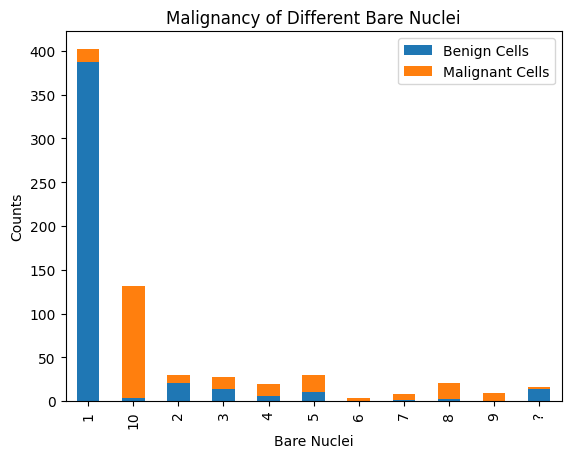

In [17]:
fig = plt.figure()
df=pd.DataFrame({'Benign Cells':benign, 'Malignant Cells':malignant})
df.plot(kind='bar', stacked=True)
plt.title("Malignancy of Different Bare Nuclei")
plt.xlabel("Bare Nuclei")
plt.ylabel("Counts") 
plt.show()

Similar to the previous graph, the values of benign cells are concentrated in measure 1, and the values of malignant cells are concentrated in measure 10, but there is also some distribution of other values. We can perhaps use measure 1 and 10 as the division, measure 1 is more likely to be benign cells, measure 10 is more likely to be malignant cells. 

Some of the data entries are '?' , to deal the missing data, we will analyze its relation with other attributes.

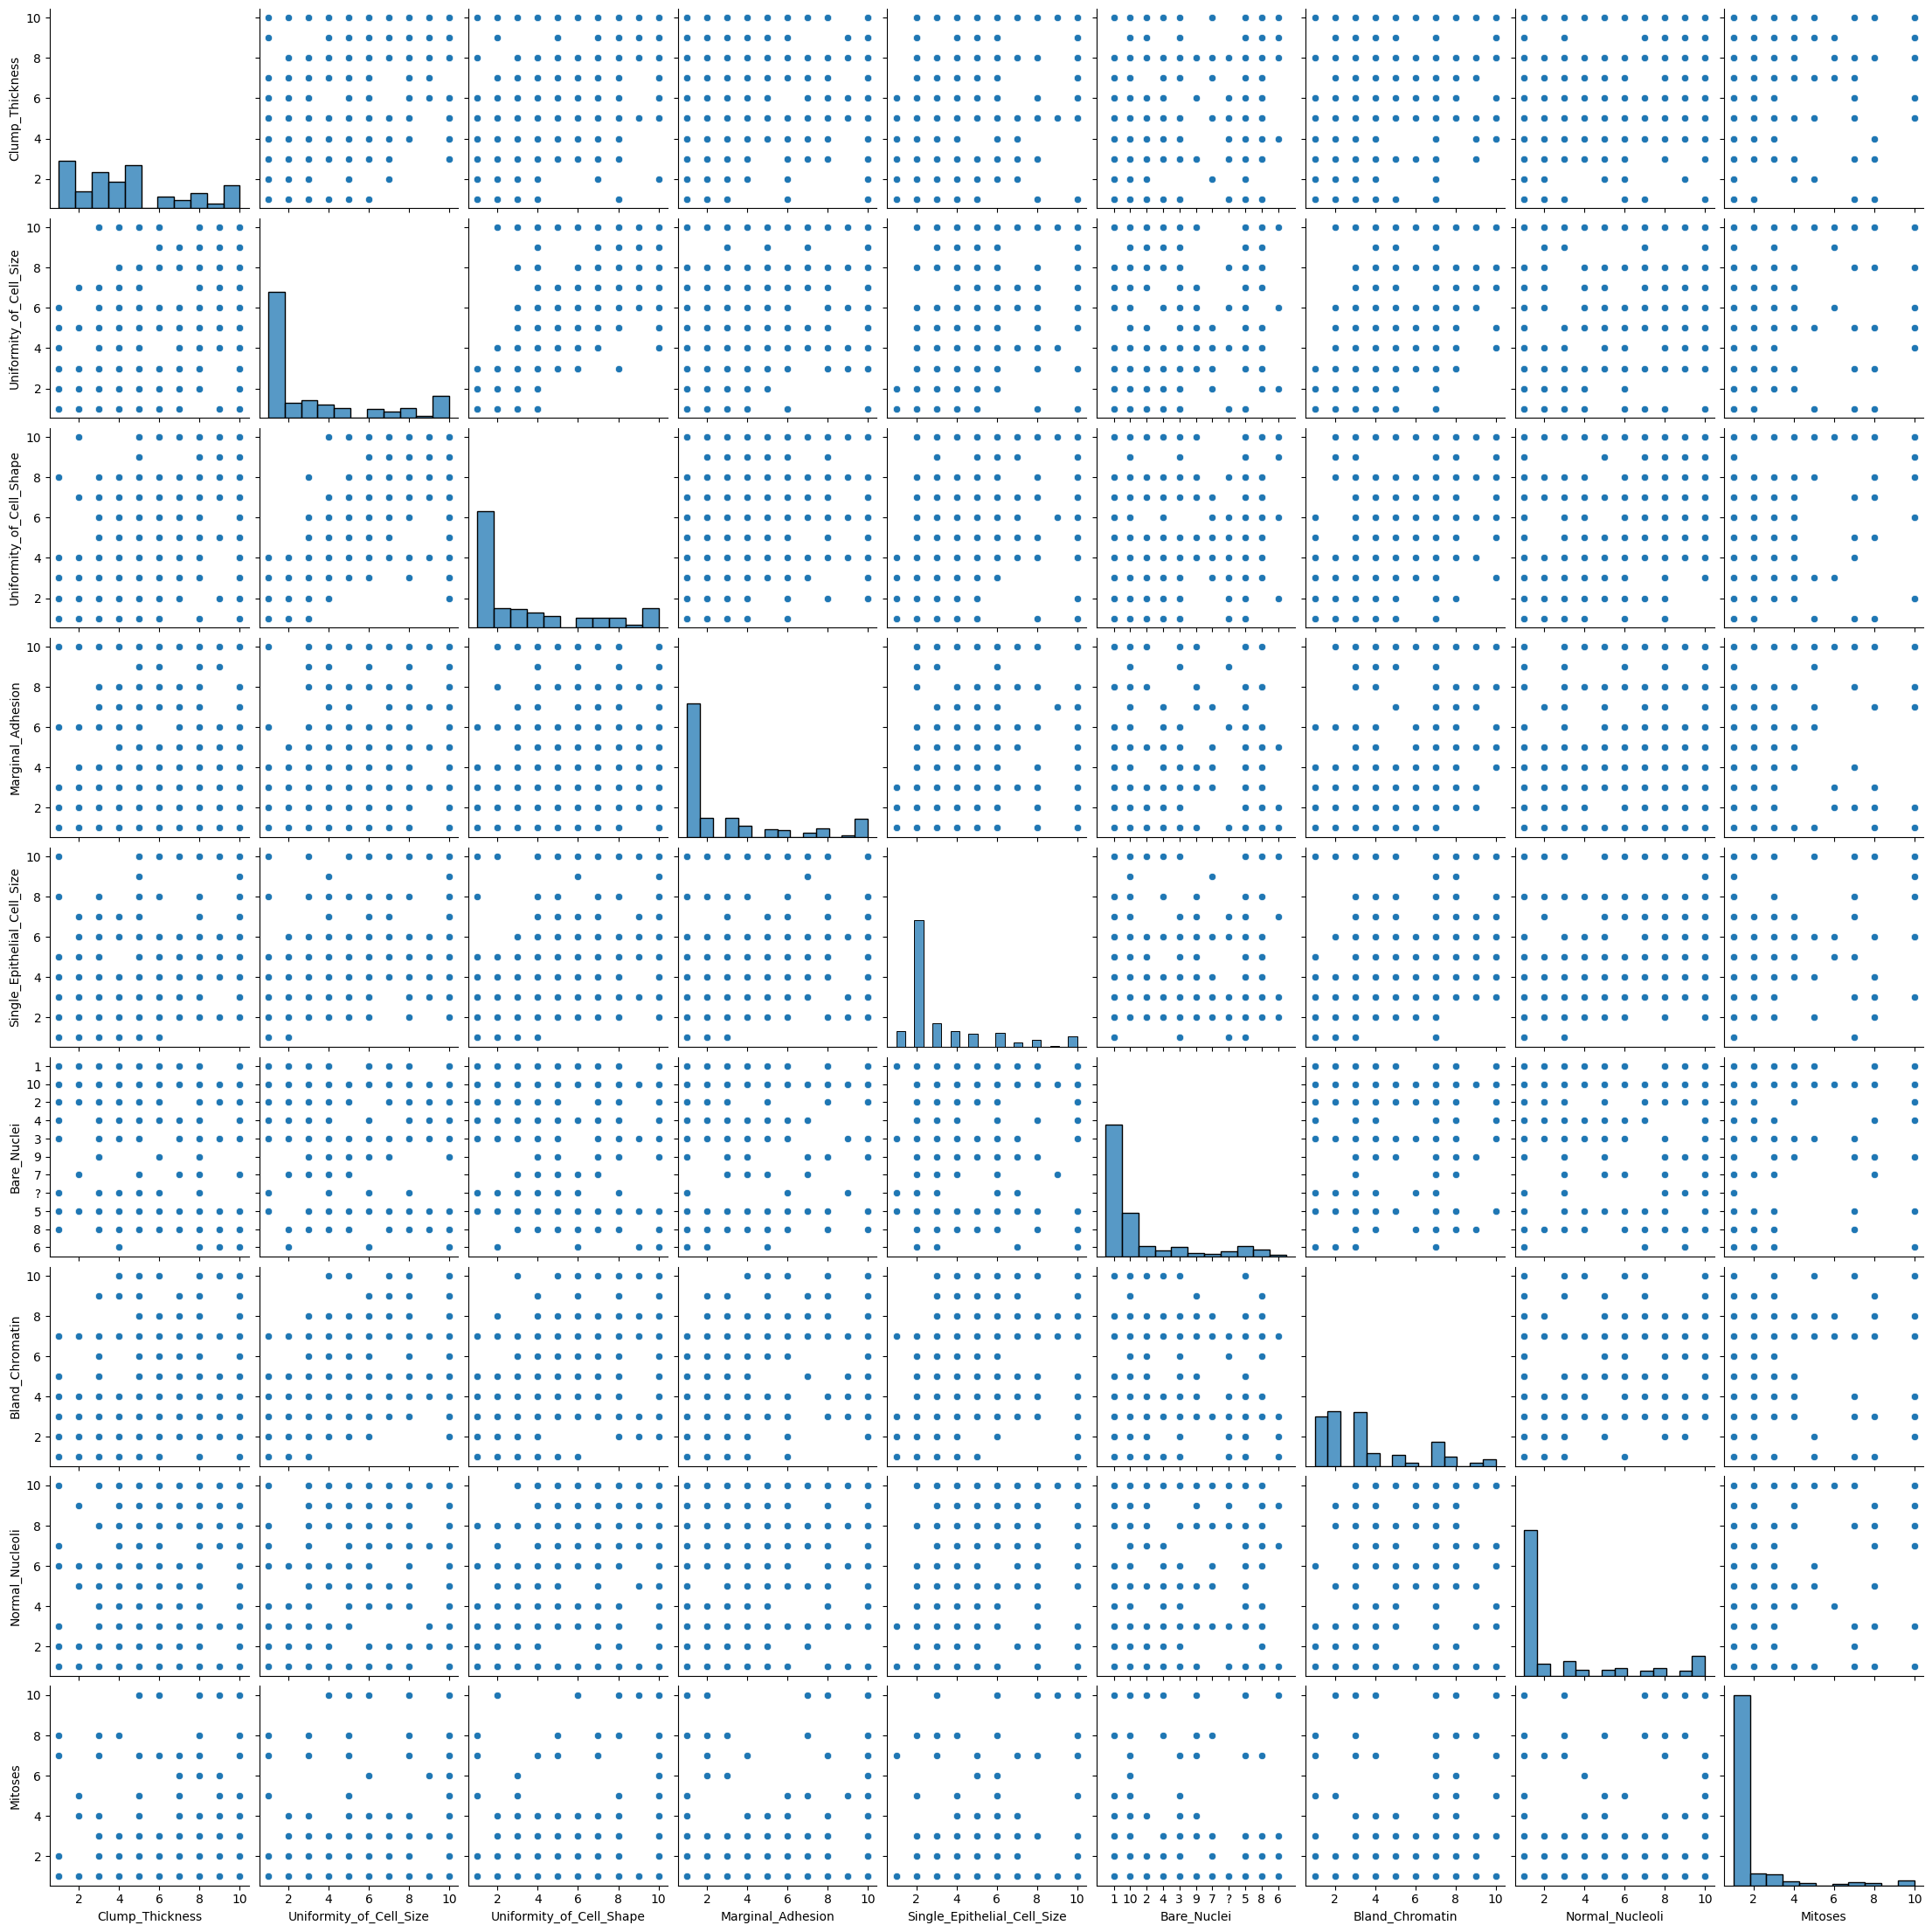

In [18]:
sns.pairplot(data_train, 
             vars = ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
                    'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'],);

No obvious pattern, we will analyze it in data preprocessing stage.

**Relations between Bland Chromatin and Malignancy**

In [19]:
benign = data_train.Bland_Chromatin[data_train.Class == 2].value_counts()
malignant = data_train.Bland_Chromatin[data_train.Class == 4].value_counts()

<Figure size 640x480 with 0 Axes>

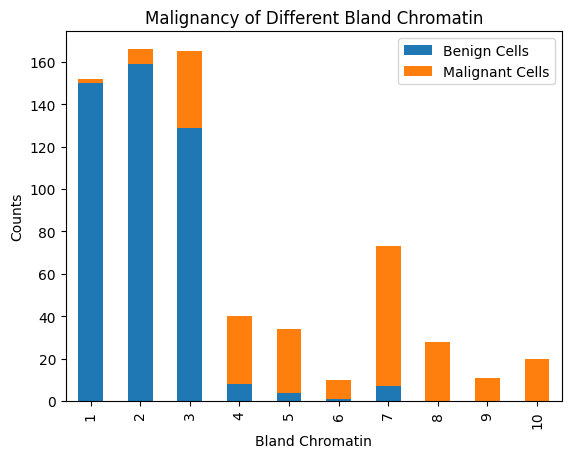

In [20]:
fig = plt.figure()
df=pd.DataFrame({'Benign Cells':benign, 'Malignant Cells':malignant})
df.plot(kind='bar', stacked=True)
plt.title("Malignancy of Different Bland Chromatin")
plt.xlabel("Bland Chromatin")
plt.ylabel("Counts") 
plt.show()

According to the graph, we can see that the values of benign cells are concentrated in measure 1, 2 and 3, and the values of malignant cells are distributed in other values. We can still use measure 1 and 10 as the division, the actual measure number close to measure 1 is more likely to be benign cells, the actual measure number close to measure 10 is more likely to be malignant cells. 

**Relations between Normal Nucleoli and Malignancy**

In [21]:
benign = data_train.Normal_Nucleoli[data_train.Class == 2].value_counts()
malignant = data_train.Normal_Nucleoli[data_train.Class == 4].value_counts()

<Figure size 640x480 with 0 Axes>

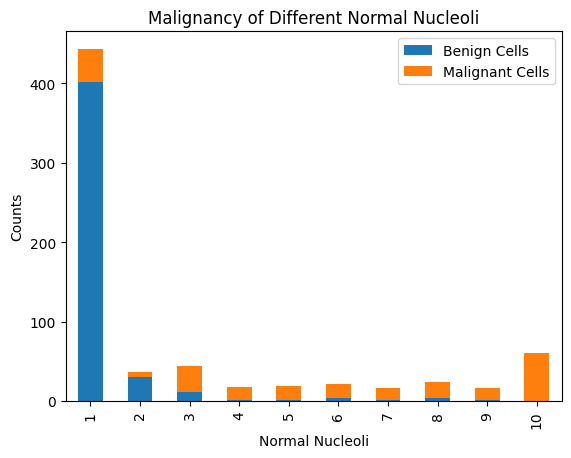

In [22]:
fig = plt.figure()
df=pd.DataFrame({'Benign Cells':benign, 'Malignant Cells':malignant})
df.plot(kind='bar', stacked=True)
plt.title("Malignancy of Different Normal Nucleoli")
plt.xlabel("Normal Nucleoli")
plt.ylabel("Counts") 
plt.show()

According to the graph, we can see that the values of benign cells are concentrated in measure 1, 2, and the values of malignant cells are distributed in other values except measure 2. We can still use measure 1 and 10 as the division, the actual measure number close to measure 1 is more likely to be benign cells, the actual measure number close to measure 10 are more likely to be malignant cells. 

**Relations between Mitoses and Malignancy**

In [23]:
benign = data_train.Mitoses[data_train.Class == 2].value_counts()
malignant = data_train.Mitoses[data_train.Class == 4].value_counts()

<Figure size 640x480 with 0 Axes>

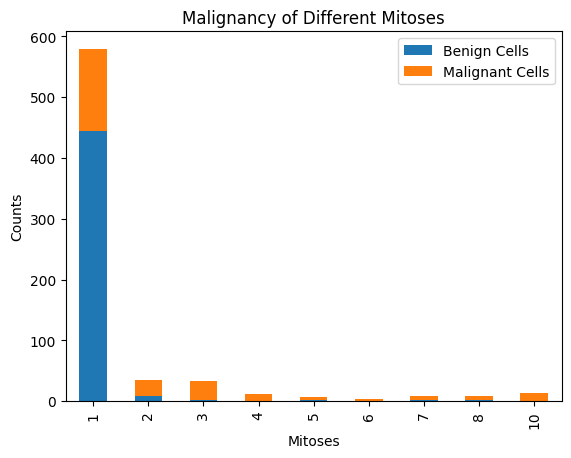

In [24]:
fig = plt.figure()
df=pd.DataFrame({'Benign Cells':benign, 'Malignant Cells':malignant})
df.plot(kind='bar', stacked=True)
plt.title("Malignancy of Different Mitoses")
plt.xlabel("Mitoses")
plt.ylabel("Counts") 
plt.show()

This graph shows more clearly that the values of benign cells are concentrated in measure 1, and the values of malignant cells are distributed in other values. We can still use measure 1 and 10 as the division, the actual measure number close to measure 1 is more likely to be benign cells, and the actual measure number close to measure 10 is more likely to be malignant cells. 

In summary, we can conclude that 
- Clump Thickness, 
- Uniformity of Cell Size, 
- Uniformity of Cell Shape, 
- Marginal Adhesion 

are not strongly related to cell malignancy.

- Single Epithelial Cell Size, 
- Bare Nuclei,
- Bland Chromatin, 
- Normal Nucleoli, 
- Mitoses 

are closely related to the malignancy of the cells, and these attributes all basically follow the same reasoning. Cells with actual measurements close to measurement 1 are more likely to be benign, while cells with actual measurements close to measurement 10 are more likely to be malignant.

**3. Data Preprocessing**

deal with any gaps of missing data in Bare Nuclei attribute

From analyzing, we find out for Bare Nuclei, there is a similarity with other attributes(Single Epithelial Cell Size, Bland Chromatin...), the closer the measure is to measure 1, the more likely it is to be a benign cell. In addition, the previous pairplot results showed no significant correlation between Bare Nuclei and other attributes(Clump Thickness, Marginal Adhesion...). We only start with attributes that have similar characteristics

In [25]:
data_train['Bare_Nuclei'] = data_train['Bare_Nuclei'].replace("?","-1")  #remove all the question mark

In [26]:
data_train['Bare_Nuclei'] = data_train['Bare_Nuclei'].astype(int)  #convert to it to better analyze

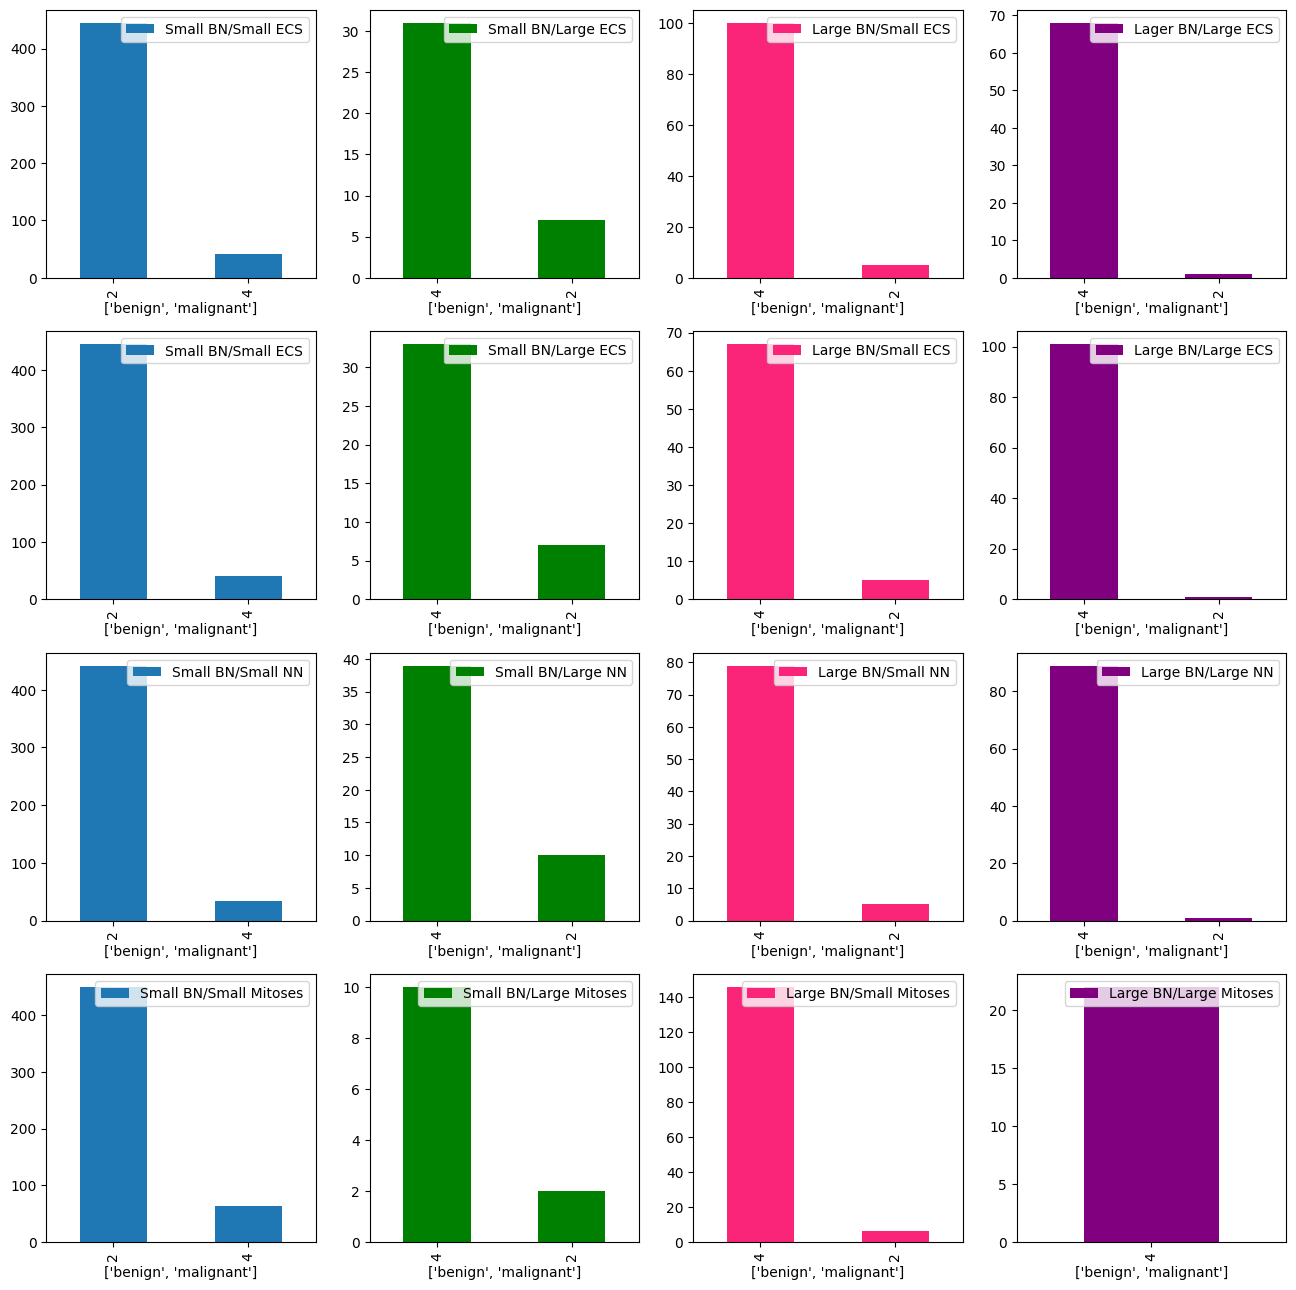

In [27]:
fig=plt.figure()
fig.set_size_inches(16, 16)

plt.subplot2grid((4,4),(0,0))
data_train.Class[data_train.Bare_Nuclei <= 5][data_train.Single_Epithelial_Cell_Size <= 5].value_counts().plot(kind='bar', label="female highclass")
plt.xlabel(["benign", "malignant"])
plt.legend(["Small BN/Small ECS"], loc='best')
plt.subplot2grid((4,4),(0,1))
data_train.Class[data_train.Bare_Nuclei <= 5][data_train.Single_Epithelial_Cell_Size > 5].value_counts().plot(kind='bar', label="female highclass", color='green')
plt.xlabel(["benign", "malignant"])
plt.legend(["Small BN/Large ECS"], loc='best')
plt.subplot2grid((4,4),(0,2))
data_train.Class[data_train.Bare_Nuclei > 5][data_train.Single_Epithelial_Cell_Size <= 5].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
plt.xlabel(["benign", "malignant"])
plt.legend(["Large BN/Small ECS"], loc='best')
plt.subplot2grid((4,4),(0,3))
data_train.Class[data_train.Bare_Nuclei > 5][data_train.Single_Epithelial_Cell_Size > 5].value_counts().plot(kind='bar', label="female highclass", color='purple')
plt.xlabel(["benign", "malignant"])
plt.legend(["Lager BN/Large ECS"], loc='best')

plt.subplot2grid((4,4),(1,0))
data_train.Class[data_train.Bare_Nuclei <= 5][data_train.Bland_Chromatin <= 5].value_counts().plot(kind='bar', label="female highclass")
plt.xlabel(["benign", "malignant"])
plt.legend(["Small BN/Small ECS"], loc='best')
plt.subplot2grid((4,4),(1,1))
data_train.Class[data_train.Bare_Nuclei <= 5][data_train.Bland_Chromatin > 5].value_counts().plot(kind='bar', label="female highclass", color='green')
plt.xlabel(["benign", "malignant"])
plt.legend(["Small BN/Large ECS"], loc='best')
plt.subplot2grid((4,4),(1,2))
data_train.Class[data_train.Bare_Nuclei > 5][data_train.Bland_Chromatin <= 5].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
plt.xlabel(["benign", "malignant"])
plt.legend(["Large BN/Small ECS"], loc='best')
plt.subplot2grid((4,4),(1,3))
data_train.Class[data_train.Bare_Nuclei > 5][data_train.Bland_Chromatin > 5].value_counts().plot(kind='bar', label="female highclass", color='purple')
plt.xlabel(["benign", "malignant"])
plt.legend(["Large BN/Large ECS"], loc='best')

plt.subplot2grid((4,4),(2,0))
data_train.Class[data_train.Bare_Nuclei <= 5][data_train.Normal_Nucleoli <= 5].value_counts().plot(kind='bar', label="female highclass")
plt.xlabel(["benign", "malignant"])
plt.legend(["Small BN/Small NN"], loc='best')
plt.subplot2grid((4,4),(2,1))
data_train.Class[data_train.Bare_Nuclei <= 5][data_train.Normal_Nucleoli > 5].value_counts().plot(kind='bar', label="female highclass", color='green')
plt.xlabel(["benign", "malignant"])
plt.legend(["Small BN/Large NN"], loc='best')
plt.subplot2grid((4,4),(2,2))
data_train.Class[data_train.Bare_Nuclei > 5][data_train.Normal_Nucleoli <= 5].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
plt.xlabel(["benign", "malignant"])
plt.legend(["Large BN/Small NN"], loc='best')
plt.subplot2grid((4,4),(2,3))
data_train.Class[data_train.Bare_Nuclei > 5][data_train.Normal_Nucleoli > 5].value_counts().plot(kind='bar', label="female highclass", color='purple')
plt.xlabel(["benign", "malignant"])
plt.legend(["Large BN/Large NN"], loc='best')

plt.subplot2grid((4,4),(3,0))
data_train.Class[data_train.Bare_Nuclei <= 5][data_train.Mitoses <= 5].value_counts().plot(kind='bar', label="female highclass")
plt.xlabel(["benign", "malignant"])
plt.legend(["Small BN/Small Mitoses"], loc='best')
plt.subplot2grid((4,4),(3,1))
data_train.Class[data_train.Bare_Nuclei <= 5][data_train.Mitoses > 5].value_counts().plot(kind='bar', label="female highclass", color='green')
plt.xlabel(["benign", "malignant"])
plt.legend(["Small BN/Large Mitoses"], loc='best')
plt.subplot2grid((4,4),(3,2))
data_train.Class[data_train.Bare_Nuclei > 5][data_train.Mitoses <= 5].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
plt.xlabel(["benign", "malignant"])
plt.legend(["Large BN/Small Mitoses"], loc='best')
plt.subplot2grid((4,4),(3,3))
data_train.Class[data_train.Bare_Nuclei > 5][data_train.Mitoses > 5].value_counts().plot(kind='bar', label="female highclass", color='purple')
plt.xlabel(["benign", "malignant"])
plt.legend(["Large BN/Large Mitoses"], loc='best')

plt.show()

The above figure once again proves that our conjecture is justified, and we will use this conclusion next to fill in any gaps of missing data in Bare Nuclei.

In [28]:
def BareNucleiApprox(cols):   #defind a table with only the 5 columns we need, so to save space
    
    CellSize = cols[0]
    BareNuclei = cols[1]
    BlandChromatin = cols[2]
    NormalNucleoli = cols[3]
    Mitoses = cols[4]
    
    #use the mean of the four important attributes to approximate
    mean = (CellSize + BlandChromatin + NormalNucleoli + Mitoses)/4
    
    if BareNuclei == -1:  
        if mean <= 5:
            return 2.5
        else:
            return 7.5
    else:
        return BareNuclei

In [29]:
data_train['Bare_Nuclei'] = data_train[['Single_Epithelial_Cell_Size', 'Bare_Nuclei', 
                                        'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']].apply(BareNucleiApprox, axis=1)

In [30]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           699 non-null    int64  
 1   Clump_Thickness              699 non-null    int64  
 2   Uniformity_of_Cell_Size      699 non-null    int64  
 3   Uniformity_of_Cell_Shape     699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  699 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [31]:
data_train.Bare_Nuclei.unique()

array([ 1. , 10. ,  2. ,  4. ,  3. ,  9. ,  7. ,  2.5,  5. ,  7.5,  8. ,
        6. ])

Obiviously, id is irrelavant to the final result, we can directly remove it.

In [32]:
data_train = data_train.drop(['id'], 1)

/var/folders/nw/m2f36hr10ql32mhz1g5x26hh0000gn/T/ipykernel_5775/537780822.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_train = data_train.drop(['id'], 1)


In [33]:
# data_train = data_train.drop(['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion'], 1)

In [34]:
#convert categorical result into binary data
def ConvertBinary(cols):   #defind a table with only the 5 columns we need, so to save space
    result = cols[0]
    
    if result == 2:  
        return 0
    else:
        return 1

In [35]:
data_train['Class'] = data_train[['Class']].apply(ConvertBinary, axis=1)

In [36]:
data_train.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [37]:
print(data_train.corr())

                             Clump_Thickness  Uniformity_of_Cell_Size  \
Clump_Thickness                     1.000000                 0.644913   
Uniformity_of_Cell_Size             0.644913                 1.000000   
Uniformity_of_Cell_Shape            0.654589                 0.906882   
Marginal_Adhesion                   0.486356                 0.705582   
Single_Epithelial_Cell_Size         0.521816                 0.751799   
Bare_Nuclei                         0.589074                 0.690285   
Bland_Chromatin                     0.558428                 0.755721   
Normal_Nucleoli                     0.535835                 0.722865   
Mitoses                             0.350034                 0.458693   
Class                               0.716001                 0.817904   

                             Uniformity_of_Cell_Shape  Marginal_Adhesion  \
Clump_Thickness                              0.654589           0.486356   
Uniformity_of_Cell_Size                     

<AxesSubplot: >

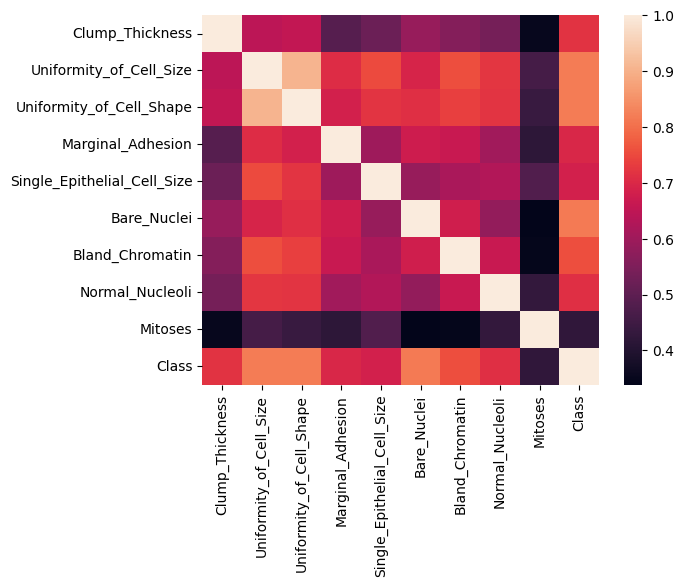

In [38]:
sns.heatmap(data_train.corr())

**Information on the processed train dataset**

In [39]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_of_Cell_Size      699 non-null    int64  
 2   Uniformity_of_Cell_Shape     699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  699 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


**4. Build the Model(Logistic Regression)**

Logistic regression is a classification algorithm that predicts a binary outcome based on a series of independent categorical variables. By using this algorithm, we could easily sort the cells into 'benign' and 'malignant' categories.

In [40]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [41]:
data_train.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [52]:
#define X and y
X = data_train.iloc[:,1:10].values
y = data_train.iloc[:,9].values
#divide training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)     #testing data will take 30%
#import Logistic Regression model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       138
           1       0.99      1.00      0.99        72

    accuracy                           1.00       210
   macro avg       0.99      1.00      0.99       210
weighted avg       1.00      1.00      1.00       210



In [53]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [54]:
data_test = data_train  #have to reuse this dataset to test
data_test = data_test.drop(['Class'], 1)
data_test

/var/folders/nw/m2f36hr10ql32mhz1g5x26hh0000gn/T/ipykernel_5775/2334627380.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_test = data_test.drop(['Class'], 1)


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [55]:
X_test = data_test.iloc[:,:].values
y_test = data_test.iloc[:,0].values

In [56]:
y_test_pred = LogReg.predict(X_test)

In [57]:
y_test_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [58]:
arr = y_test_pred.tolist() 

In [59]:
len(y_test_pred)

699

In [60]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_of_Cell_Size      699 non-null    int64  
 2   Uniformity_of_Cell_Shape     699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  699 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB
